In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('balls.csv')

In [3]:
df.head()

,album,artists,text,url
0,Not for Sale,Smoke DZA,"Harlem rapper Smoke DZA keeps it real on ,, do...",NaN
1,Bloodline,Steven Julien,The London producer pays tribute to his musica...,NaN
2,Crop Circle,Nines,The latest album from the star of UK road rap ...,NaN
3,Gate 13,"Del the Funky Homosapien,Amp Live",Protean future-funk production steals the show...,NaN
4,A Piece of Beyond,DJ Bone,The veteran DJ confirms his status as a treasu...,NaN


In [5]:
df.shape

(12, 4)

In [42]:
import json

In [43]:
pitch = json.load(open('nested.json'))

In [44]:
type(pitch)

list

In [45]:
len(pitch)

48

In [46]:
df = pd.DataFrame()

In [47]:
from textblob import TextBlob

In [52]:
pitch[0]['album'][0]

'A Piece of Beyond'

In [67]:
pitch[1]['album'][0]

'Sparrow'

In [72]:
pitch[0]['artists'][0]

'DJ Bone'

In [73]:
len(pitch)

48

In [107]:
artists = []
for i in range(len(pitch)):
    if len(pitch[i]['artists']) > 0:
        artists.append(pitch[i]['artists'][0])
    else:
        artists.append('na')

In [108]:
len(artists)

48

In [111]:
album = []
artists = []
review = []
for al in range(48):
    album.append(pitch[al]['album'][0])
    if len(pitch[al]['artists']) > 0:
        artists.append(pitch[al]['artists'][0])
    else:
        artists.append('na')
    review.append(pitch[al]['text'][0])

In [112]:
artists

['DJ Bone',
 'Ashley Monroe',
 'Sleep',
 'Smoke DZA',
 'Steven Julien',
 'Del the Funky Homosapien',
 'Nines',
 'Mr. Fingers',
 'Captain Beefheart and His Magic Band',
 'Sarah Davachi',
 'GUM',
 'Ross From Friends',
 'Daniel Avery',
 'Forth Wanderers',
 'Neil Young',
 'Dylan Carlson',
 'PeeWee Longway',
 'Speedy Ortiz',
 'Princess Nokia',
 'Mouse on Mars',
 'Ricky Eat Acid',
 'DRINKS',
 'Lena Willikens',
 'Littlebabyangel',
 'Robert Glasper',
 'A Perfect Circle',
 'Denmark Vessey',
 'Panopticon',
 'J. Cole',
 'War On Women',
 'Gang of Four',
 'Ras G & the Afrikan Space Program',
 'Kimbra',
 'Half Waif',
 'The Caretaker',
 'Tinashe',
 'na',
 'nothing,nowhere.',
 'Sting',
 'International Harvester',
 'Alexis Taylor',
 'Jonathan Richman',
 'John Maus',
 'Post Animal',
 'Shuggie Otis',
 'Smokepurpp',
 'The National',
 'Yazan']

In [114]:
df = pd.DataFrame()
df['Albums'] = album
df['Artist'] = artists
df['Review'] = review

In [115]:
df.head()

,Albums,Artist,Review
0,A Piece of Beyond,DJ Bone,The veteran DJ confirms his status as a treasu...
1,Sparrow,Ashley Monroe,The Nashville singer-songwriter looks backward...
2,The Sciences,Sleep,Best new music
3,Not for Sale,Smoke DZA,Harlem rapper Smoke DZA keeps it real on
4,Bloodline,Steven Julien,The London producer pays tribute to his musica...


In [116]:
pol =[]
subj = []
for rev in df.Review:
    blob = TextBlob(rev)
    pol.append(blob.sentiment[0])
    subj.append( blob.sentiment[1])

In [117]:
df['Polarity'] = pol
df['Subjectivity'] = pol

In [118]:
df.head()

,Albums,Artist,Review,Polarity,Subjectivity
0,A Piece of Beyond,DJ Bone,The veteran DJ confirms his status as a treasu...,0.155556,0.155556
1,Sparrow,Ashley Monroe,The Nashville singer-songwriter looks backward...,0.166667,0.166667
2,The Sciences,Sleep,Best new music,0.568182,0.568182
3,Not for Sale,Smoke DZA,Harlem rapper Smoke DZA keeps it real on,0.200000,0.200000
4,Bloodline,Steven Julien,The London producer pays tribute to his musica...,0.178788,0.178788


In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

In [126]:
df_top = df.nlargest(10, 'Polarity')

In [127]:
df_top

,Albums,Artist,Review,Polarity,Subjectivity
2,The Sciences,Sleep,Best new music,0.568182,0.568182
8,Trout Mask Replica,Captain Beefheart and His Magic Band,Best new reissue,0.568182,0.568182
14,Roxy - Tonight’s the Night Live,Neil Young,Best new reissue,0.568182,0.568182
15,Conquistador,Dylan Carlson,The drone-metal titan’s “imaginary Western” fl...,0.500000,0.500000
47,Hahaha,Yazan,"On his first album for Exploding in Sound, thi...",0.412500,0.412500
24,The ArtScience Remixes EP,Robert Glasper,"This remix set, based on Glasper’s 2016 album,...",0.390000,0.390000
20,"am i happy, singing_",Ricky Eat Acid,On this three-track album from Sam Ray’s elect...,0.375000,0.375000
45,Bless Yo Trap,Smokepurpp,Lil Pump’s wingman goes through the motions on...,0.368182,0.368182
21,Hippo Lite,DRINKS,Cate Le Bon and Tim Presley sound blissfully r...,0.340000,0.340000
18,A Girl Cried Red,Princess Nokia,The latest mixtape from Destiny Frasqueri pull...,0.333333,0.333333


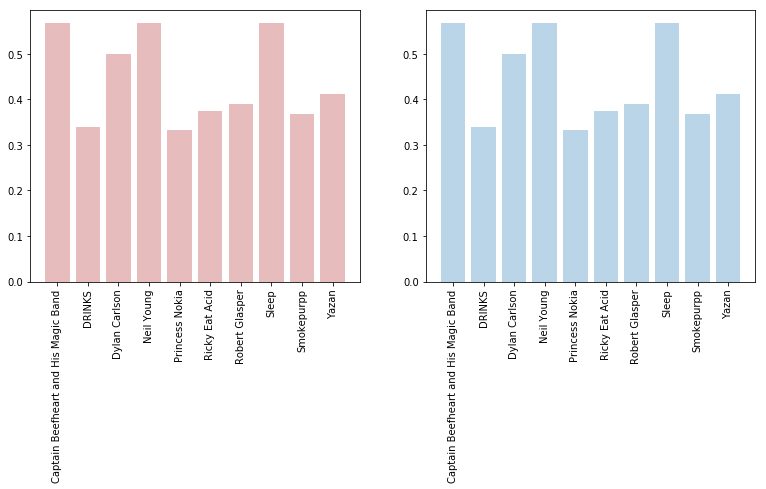

In [151]:
plt.figure(figsize = (13, 5))
plt.subplot(121)
plt.bar( df_top.Artist,  df_top.Subjectivity,  alpha = 0.3, color = 'firebrick');
plt.xticks(rotation = 90);

plt.subplot(122)
plt.bar( df_top.Artist,  df_top.Polarity,  alpha = 0.3);
plt.xticks(rotation = 90);